# Linear Regression

- skip_exec: true


In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

PROJECT_ROOT = f"{Path.cwd().parent}"

pd.set_option("display.max_columns", None)

plt.rcParams["figure.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0
plt.rcParams["axes.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0


## Linear regression with a single independent variable


Correlation tells us the strength of a linear relationship between two variables. But what if we want to predict the value of one variable given the value of another? For example, suppose we want to predict the price of a house given its size. We can do this using linear regression.

We begin by hypothesising the existence a linear model:

$$
y_i = \beta x_i + \alpha
$$

where $y_i$ is the price of the house $i$, $x_i$ is the size of the house $i$, $\beta$ is the slope of the line, $\alpha$ is the intercept. Which parameters would result in the best fit line? We can use the least squares method to find the best fit line. The least squares method minimises the **_sum of the squared errors_** (or residuals). This is also known as our cost function, $S$:

$$
S = \sum_{i=1}^n (y_i - \hat{y_i})^2
$$

where $\hat{y_i}$ is the predicted value of $y_i$.

We can subsitute our model for the predicted value of $y_i$:

$$
\begin{align}
S &= \sum_{i=1}^n (y_i - (\beta x_i + \alpha))^2 \\
&= \sum_{i=1}^n (y_i - \beta x_i - \alpha)^2
\end{align}
$$

To minimize our cost function, S, we must find where the first derivative of $S$ is equal to 0 with respect to $\alpha$ and $\beta$. The closer $\alpha$ and $\beta$ are to 0, the less the total error for each point is. Let’s start with the partial derivative of $\alpha$ first.

### Finding $\alpha$

$$
\frac{\partial S}{\partial \alpha}[\sum_{i=1}^n (y_i - \beta x_i - \alpha)^2]
$$

We can use the chain rule to find the partial derivative with respect to $\alpha$.

The outer term goes from $u^2$ to 2u (where $u =y_i - \alpha - \beta x_i$).

Within the perenthesese we treat the non-$\alpha$ terms as constants so we go from $y_i - \alpha - \beta x_i$ to $-1$.

So in the end we have:

$$
0 = \sum_{i=1}^n -2(y_i - \alpha - \beta x_i)
$$

We can divide both sides by $-2$ to get:

$$
0 = \sum_{i=1}^n (y_i - \alpha - \beta x_i)
$$

We can then break this summation in 3 parts and pull the constant $\beta$ out:

$$
0 = \sum_{i=1}^n y_i - \sum_{i=1}^n \alpha - \beta \sum_{i=1}^n x_i
$$

So the summamation of $\alpha$ to $n$ is

$$
\sum_{i=1}^n \alpha = n\alpha
$$

We can subsitute this back in to get

$$
0 = \sum_{i=1}^n y_i - n\alpha - \beta \sum_{i=1}^n x_i
$$

We are trying to solve for $\alpha$ so we add $n\alpha$ to both sides and divide by $n$.

$$
\alpha = \frac{\sum_{i=1}^n y_i - \beta \sum_{i=1}^n x_i}{n}
$$

In the above equation we are calculating the sum of $y$ and $x& and then dividing by the number of of points. In other words we are using the mean of $y$ and $x$. So we can rewrite the equation as:

$$
\alpha = \bar{y} - \beta \bar{x} \tag{1}
$$

where $\bar{y}$ is the mean of $y$ and $\bar{x}$ is the mean of $x$.

### Finding $\beta$

Having minimised the cost function of $S$ with respect to $\alpha$. Let’s find the last part which is $S$ with respect to $\beta$.

$$
\frac{\partial S}{\partial \beta}[\sum_{i=1}^n (y_i - \alpha - \beta x_i)^2]
$$

We can use the chain rule to find the partial derivative with respect to $\beta$.

The outer term goes from $u^2$ to 2u (where $u =y_i - \alpha - \beta x_i$).

Within the perenthesese we treat the non-$\beta$ terms as constants so we go from $y_i - \alpha - \beta x_i$ to $-x_i$.

So in the end we have:

$$
0 = \sum_{i=1}^n -2x_i(y_i - \alpha - \beta x_i)
$$

Again we can divide both sides by $-2$ to get:

$$
0 = \sum_{i=1}^n x_i(y_i - \alpha - \beta x_i)
$$

Multiplying each term by $x_i$ we get:

$$
0 = \sum_{i=1}^n (y_ix_i - \alpha x_i - \beta x_i^2)
$$

Let’s substitute $a$ (formula $(1)$) into the partial derivative of $S$ with respect to $\beta$ so we have a function of $\alpha$ and $\beta$ in terms of only $x$ and $y$.

$$
0 = \sum_{i=1}^n(x_iy_i - (\bar{y} - \beta\bar{x})x_i - \beta x_i^2)
$$

Multiplying out the brackets we get:

$$
0 = \sum_{i=1}^n(x_iy_i - \bar{y}x_i + \beta\bar{x}x_i - \beta x_i^2)
$$

We can split this into 2 sums

$$
0 = \sum_{i=1}^n(x_iy_i - \bar{y}x_i) + \sum_{i=1}^n(\beta\bar{x}x_i - \beta x_i^2))
$$

and factor out $-\beta$ (note the minus!)

$$
0 = \sum_{i=1}^n(x_iy_i - \bar{y}x_i) - \beta \sum_{i=1}^n(x_i^2 - \bar{x}x_i))
$$

Adding $\beta \sum_{i=1}^n(x_i^2 - \bar{x}x_i))$ to both sides and then dividing both sides by the same gives us:

$$
\beta = \frac{\sum_{i=1}^n(x_iy_i - \bar{y}x_i)}{\sum_{i=1}^n(x_i^2 - \bar{x}x_i))} \tag{2}
$$

### Conclusion

So the **tldr** is that if you have a dataset with 1 independent variable, you find the line of best fit by:

1. Calculating $\beta$ using equation $(2)$
2. Substituting $\beta$ into equation $(1)$ to find $\alpha$
3. Substituting $\beta$ and $\alpha$ into the equation for the line of best fit:

$$
\hat{y} = \beta x_i + \alpha
$$


## Examples


### With NumPy and random data


In [ ]:
def get_beta(x: np.ndarray, y: np.ndarray) -> float:
    numerator = np.sum((x * y) - (y.mean() * x))
    denominator = np.sum((x**2) - (x.mean() * x))
    return numerator / denominator


def get_alpha(x: np.ndarray, y: np.ndarray) -> float:
    return np.mean(y) - get_beta(x, y) * np.mean(x)


def predict(x_pred: np.ndarray, x_known: np.ndarray, y_known: np.ndarray) -> np.ndarray:
    y_pred = get_alpha(x_known, y_known) + get_beta(x_known, y_known) * x_pred
    return y_pred


In [ ]:
xs = np.random.rand(10) * 10
ys = np.random.rand(10) * 10
xs = np.sort(xs)
ys = np.sort(ys)

In [ ]:
beta = get_beta(xs, ys)
alpha = get_alpha(xs, ys)
print(alpha, beta)

1.177260540374534 0.9373577460801178


In [ ]:
def plot_results(x: np.ndarray, y: np.ndarray, alpha: float, beta: float) -> None:
    fig, ax = plt.subplots(figsize=(6, 5))

    x_low, x_high = np.floor(x.min()), np.ceil(x.max())
    y_low, y_high = np.floor(y.min()), np.ceil(y.max())

    ax.scatter(x, y)

    x_vals = np.linspace(x_low, x_high)
    y_vals = alpha + beta * x_vals
    ax.plot(x_vals, y_vals, "-")

    ax.set_xlim([0, x_high + 1])
    ax.set_ylim([0, y_high + 1])

    ax.set_xlabel("x values")
    ax.set_ylabel("y values")
    ax.set_title(f"Linear Regression Example\nbeta:{beta:.2f} alpha:{alpha:.2f}")

    ax.set_xmargin(0)
    ax.set_ymargin(0)

    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    ax.grid(True)

    plt.show()

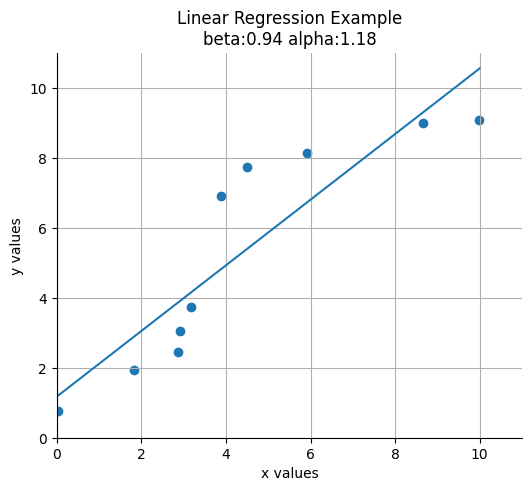

In [ ]:
plot_results(xs, ys, alpha, beta)


### With Sklearn and random data


In [ ]:
model = LinearRegression()
model.fit(xs.reshape(-1, 1), ys)

LinearRegression()

In [ ]:
beta = model.coef_.item()
alpha = model.intercept_
print(alpha, beta)

1.1772605403745358 0.9373577460801175


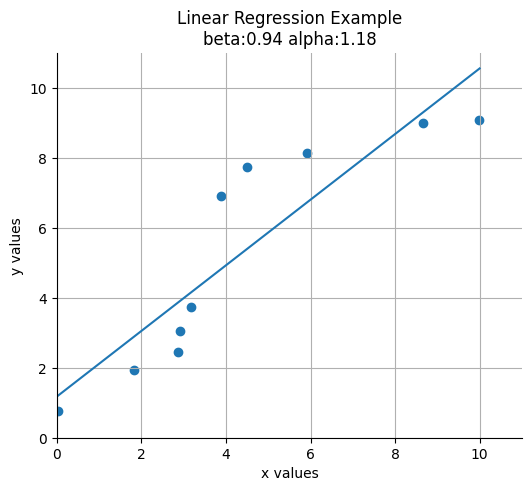

In [ ]:
plot_results(xs, ys, alpha, beta)

### Using the automoblie dataset from the UCI Machine Learning Repository


In [ ]:
df = pd.read_csv(f"{PROJECT_ROOT}/data/automobiles/imports-85.data", header=None, usecols=[21, 25], na_values=["?"])
df.columns = ["horsepower", "price"]
df = df.dropna()

xs = df["horsepower"].values
ys = df["price"].values


In [ ]:
df


,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0
...,...,...
200,114.0,16845.0
201,160.0,19045.0
202,134.0,21485.0
203,106.0,22470.0


In [ ]:
model = LinearRegression()
model.fit(xs.reshape(-1, 1), ys)

beta = model.coef_.item()
alpha = model.intercept_

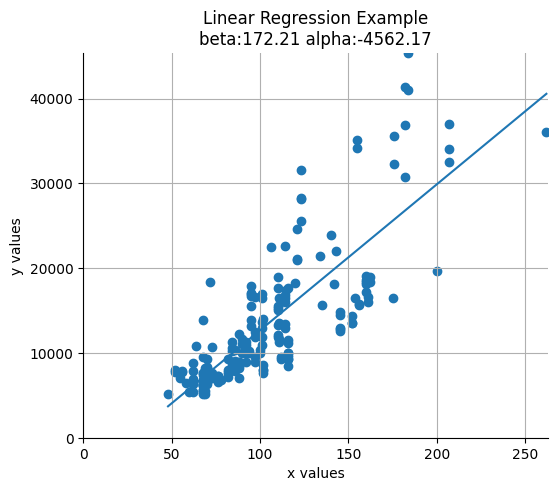

In [ ]:
plot_results(xs, ys, alpha, beta)

## Multiple regression


Consider a model with multiple independent variables. e.g. minutes spent on a social media site for data scientists:

$$
\text{minutes} = \beta_1 \text{friends} + \beta_2 \text{work hours} + \beta_3 \text{has phd} + \alpha
$$

Essentially we are expanding the model with one independent variable:

$$
y_i = \beta x_i + \alpha
$$

where $x_i$ is a single number to a model of the form:

$$
y_i = \beta_1 x_{i1} + ... + \beta_k x_{ik} + \alpha
$$

where $x_i$ is a vector of numbers $x_{i1}, ..., x_{ik}$. In multiple regression the vector of parameters is usually called $\beta$


We are making the assumption that the columns of $x$ are _linearly independent_, that there is no way to write one as the weighted sum of the others.


## References

[Linear Regression](https://medium.com/@leisyridley/linear-regression-intuition-172b52758321) -
Ridley Leisy
